<h1 style='color:#70341d;text-align:center'> Universidad Castro Carazo</h1>
<div style="display: flex; justify-content: space-between;">
    <div class="izquierda">
        <h2 style="color:#70341d;">Visualización de Datos</h2>
        <p>
            A continuación, se presentarán gráficos que representan visualmente las variables más relevantes extraídas de la base de datos del Banco Uno. Estas gráficas ofrecen una representación gráfica y detallada de la distribución, relación o comportamiento de las variables seleccionadas, proporcionando así una visión técnica y descriptiva de la información contenida en el conjunto de datos.</p>
</div>

<div class="right">
     <img src="Proyectograficas.jpg" alt="Gráfico de barras" width="500">
</div>

In [1]:
# Importar librerías necesarias
import pandas as pd  # Pandas para manipulación y análisis de datos
import numpy as np   # NumPy para operaciones numéricas eficientes
import seaborn as sns  # Seaborn para gráficos estadísticos
import matplotlib.pyplot as plt  # Matplotlib para visualización
import matplotlib as mpl  # Configuraciones adicionales de Matplotlib


<h2 style="color:#70341d;">Informacion importante sobre la base de datos "BANCO UNO"</h2>

X1: Monto del crédito otorgado (dólar NT): incluye tanto al consumidor individual crédito y su crédito familiar (complementario).

X2: Género (1 = masculino; 2 = femenino).

X3: Educación (1 = posgrado; 2 = universidad; 3 = bachillerato; 0, 4, 5, 6 = otros).

X4: Estado civil (1 = casado; 2 = soltero; 3 = divorciado; 0 = otros).

X5: Edad (año).

X6 - X11: Historial de pagos pasados. Realizamos un seguimiento de los últimos registros de pagos mensuales (desde Abril a septiembre de 2005) de la siguiente manera: X6 = el estado de reembolso en septiembre de 2005; X7 = el estado de reembolso en agosto de 2005; . . .; X11 = el estado de reembolso en abril de 2005.

La escala de medición para el estado de reembolso es:

 

2: Sin consumo; -1: pagado en su totalidad; 0: El uso de crédito renovable; 1 = retraso en el pago por un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.
 

X12-X17: Monto del extracto de la factura (dólar NT). X12 = monto del extracto de la factura en Septiembre de 2005; X13 = monto del estado de cuenta en agosto de 2005; . . .; X17 = cantidad de estado de cuenta en abril de 2005.

X18-X23: Monto del pago anterior (dólar NT). X18 = monto pagado en septiembre, 2005; X19 = monto pagado en agosto de 2005; . . .; X23 = monto pagado en abril de 2005.

Y: comportamiento del cliente; Y = 0 entonces no predeterminado, Y = 1 luego predeterminado "

In [2]:
# Configuración de los ejes del gráfico para mostrar solo la línea inferior y ocultar las demás.
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [3]:
# Leer un archivo Excel ('BancoUno1.xlsx') y crear un DataFrame llamado 'dbbanco'
# engine='openpyxl' indica el motor de lectura Excel a utilizar
dbbanco = pd.read_excel('BancoUno1.xlsx', engine='openpyxl')

# Mostrar las primeras 3 filas del DataFrame 'dbbanco' para visualizar los datos
dbbanco.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month(Y)
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default


In [4]:
# Obtener los tipos de datos únicos presentes en el DataFrame 'dbbanco'
# Utilizando set para obtener valores únicos y luego convirtiéndolo a una lista
unique_data_types = list(set(dbbanco.dtypes.tolist()))

# Imprimir la lista de tipos de datos únicos
print(unique_data_types)

[dtype('O'), dtype('int64')]


In [5]:
# Utilizar el método describe para obtener estadísticas descriptivas de las columnas numéricas
dbbanco.describe()

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,...,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000
mean,165834.724541,1.580134,35.419866,0.004591,-0.136477,-0.151920,-0.249165,-0.259599,-0.282137,51199.401085,...,45511.918614,41544.281302,39992.825125,38797.298414,5548.942821,5220.050501,4855.443656,4891.429883,4984.977880,5149.928631
std,129493.683277,0.525593,9.452344,1.123473,1.207902,1.247411,1.176359,1.156723,1.181852,77872.623393,...,69632.762068,68117.135902,64327.134703,65468.199929,13701.948666,14616.927369,22156.285391,14252.068389,16896.223773,20076.659470
min,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,...,-9850.000000,-7905.000000,-28335.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3125.000000,...,2296.750000,1856.000000,1524.000000,1012.000000,997.500000,588.000000,247.750000,240.000000,247.750000,0.000000
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21111.500000,...,19468.500000,17918.500000,17588.500000,15819.500000,2117.500000,2000.000000,1443.000000,1500.000000,1500.000000,1328.000000
75%,230000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62921.250000,...,56221.750000,49304.000000,48517.750000,47369.500000,5002.250000,4921.750000,4000.000000,4000.000000,4000.000000,4000.000000
max,1000000.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,964511.000000,...,548020.000000,891586.000000,927171.000000,961664.000000,239104.000000,285138.000000,896040.000000,205000.000000,332000.000000,528666.000000


In [6]:
# Obtener los tipos de datos únicos presentes en el DataFrame 'dbbanco'
list(set(dbbanco.dtypes.tolist()))

[dtype('O'), dtype('int64')]

In [7]:
# Seleccionar columnas del DataFrame 'dbbanco' que tienen tipos de datos 'int64' y 'object'
dbbanco_num = dbbanco.select_dtypes(include=['int64', 'object'])
# Mostrar las primeras filas del nuevo DataFrame 'dbbanco_num'
dbbanco_num.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month(Y)
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'MARRIAGE'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'PAY_0'}>,
        <Axes: title={'center': 'PAY_2'}>],
       [<Axes: title={'center': 'PAY_3'}>,
        <Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>,
        <Axes: title={'center': 'BILL_AMT1'}>],
       [<Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>,
        <Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>],
       [<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>,
        <Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>],
       [<Axes: title={'center': 'PAY_AMT6'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >

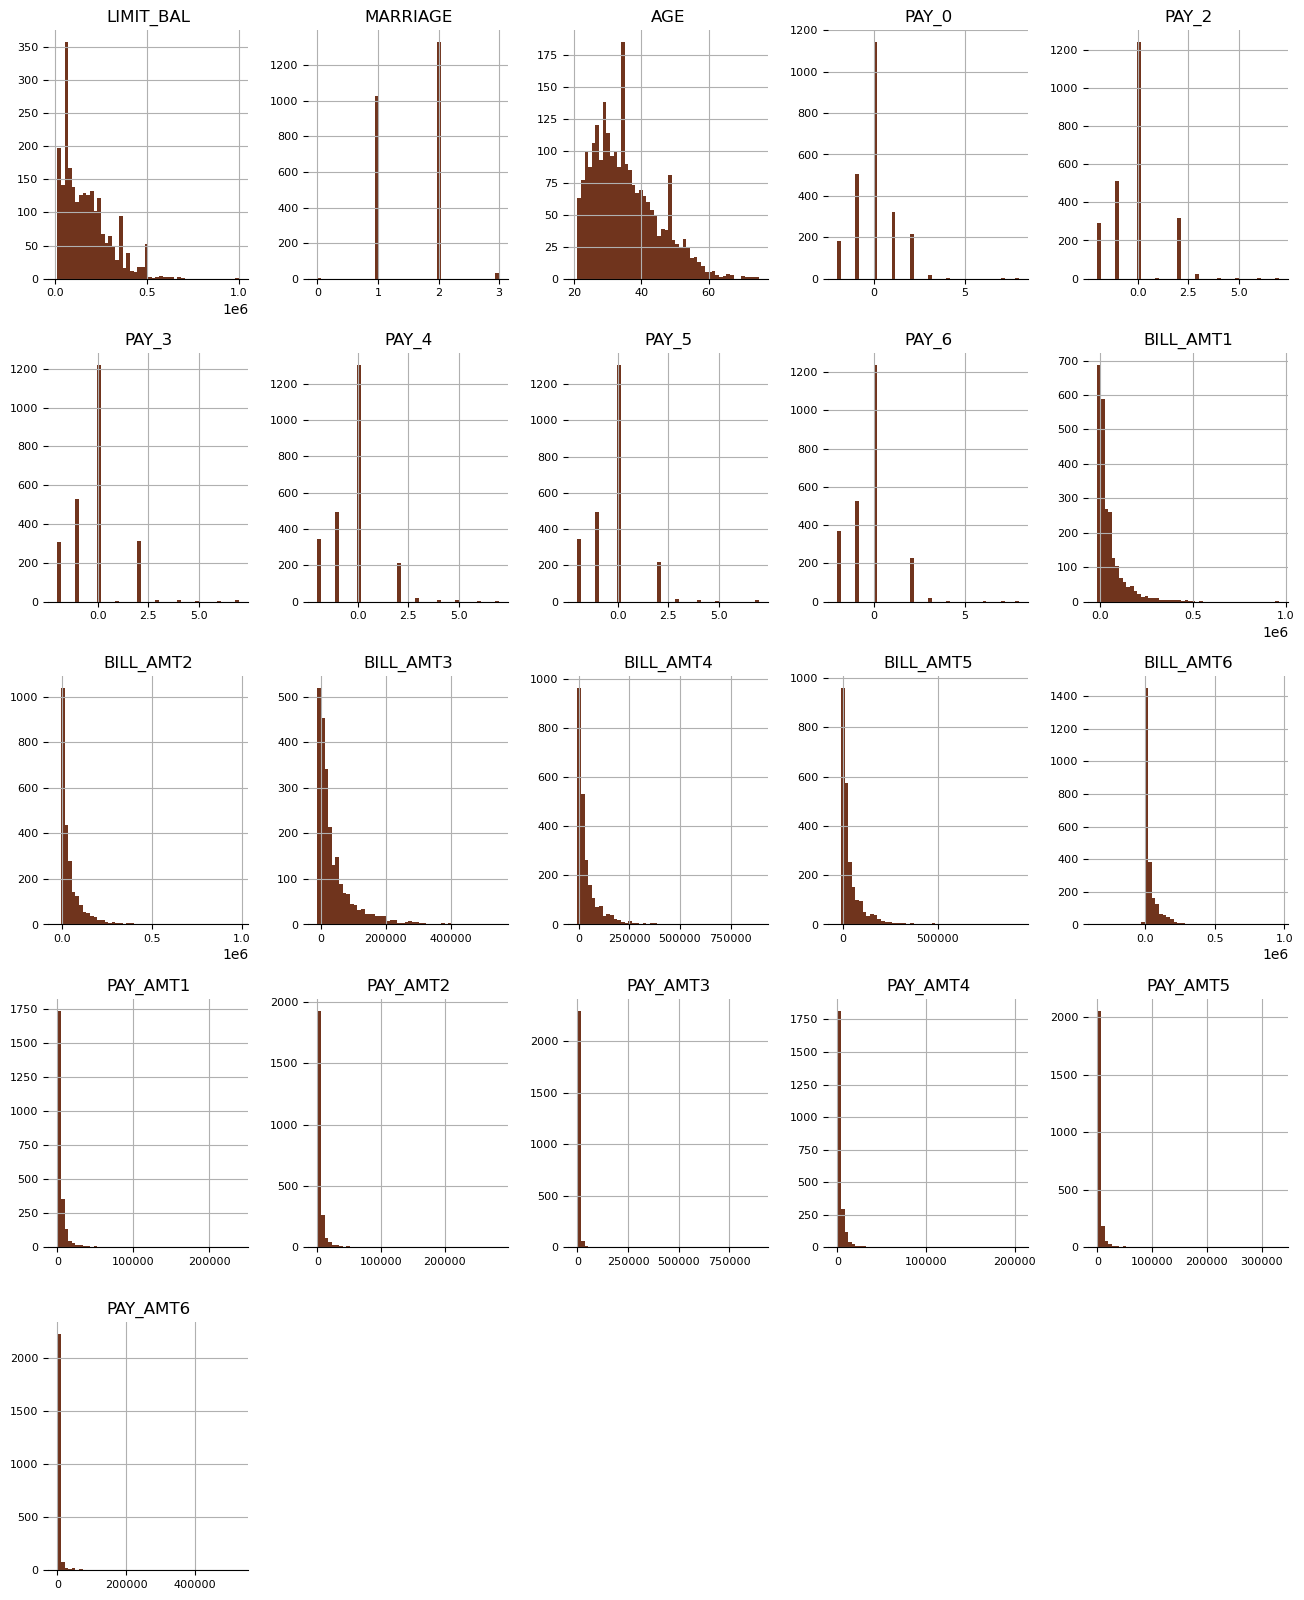

In [8]:
# Crear un histograma para las columnas numéricas del DataFrame 'dbbanco_num'
# figsize=(16, 20): Tamaño de la figura del histograma
# bins=50: Número de intervalos (bins) en el histograma
# xlabelsize=8: Tamaño de la fuente para las etiquetas del eje x
# ylabelsize=8: Tamaño de la fuente para las etiquetas del eje y
# color='#70341d': Color de las barras en el histograma
dbbanco_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color='#70341d')

In [9]:
# Obtener los nombres de las columnas del DataFrame 'dbbanco'
header = dbbanco.dtypes.index
# 'dbbanco.dtypes' devuelve un objeto Series que contiene los tipos de datos de cada columna del DataFrame.
# 'index' se utiliza para obtener los nombres de las columnas, que son los índices del objeto Series.
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month(Y)'],
      dtype='object')


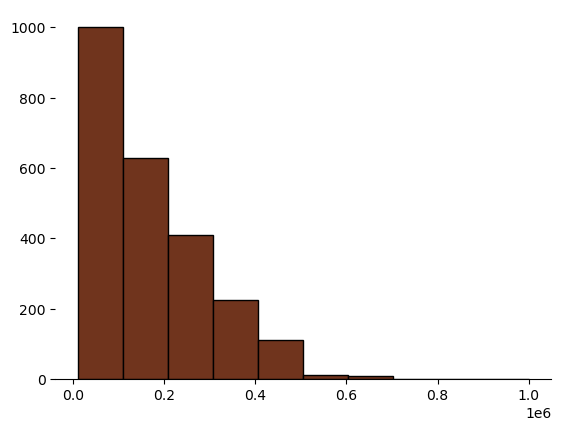

In [10]:
plt.hist(dbbanco['LIMIT_BAL'], color=['#70341d'], edgecolor='black') # Crear un histograma
plt.show() # Mostrar el histograma

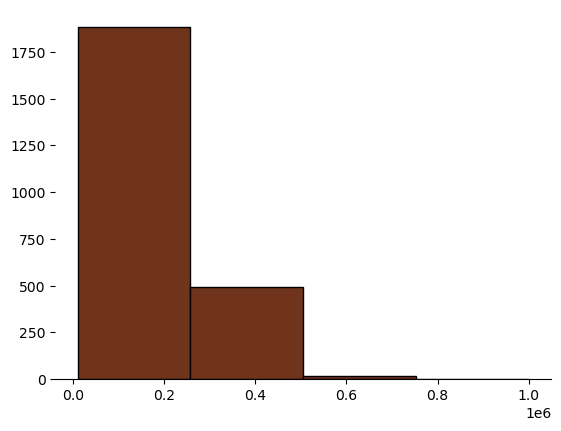

In [11]:
plt.hist(dbbanco['LIMIT_BAL'], bins=4, color=['#70341d'], edgecolor='black') # Crear un histograma con 4 bins
plt.show()

In [12]:
bins = np.linspace(21, 75, 12) # Crear 12 puntos espaciados de manera uniforme entre 21 y 75
# Los bins son utilizados para agrupar los datos en intervalos específicos en un histograma
# En este caso, se están creando 12 intervalos entre 21 y 75 para el análisis de datos

In [13]:
# Definir los nombres de los grupos
groupNames = ['21-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75']
# Crear una nueva columna 'AGES_BINS' en el DataFrame
dbbanco['AGES_BINS'] = pd.cut(dbbanco['AGE'], bins, labels=groupNames, include_lowest=True)

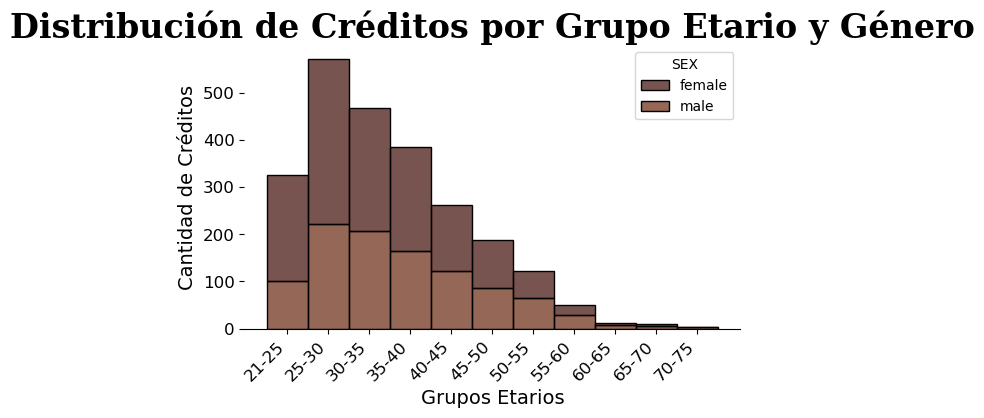

In [14]:
# Crear un gráfico de barras apiladas
sns.histplot(dbbanco, x='AGES_BINS', hue='SEX', multiple='stack', edgecolor='black', palette=['#4a1b14', '#70341d'])

# Formato del gráfico
# Título y Subtítulo del gráfico
title_t = 'Distribución de Créditos por Grupo Etario y Género'
plt.title(title_t, fontsize=24, fontweight='bold', fontfamily='serif')


# Etiquetas en Eje X y Y
plt.xlabel('Grupos Etarios', fontsize=14, fontweight='regular', fontfamily='sans')
plt.ylabel('Cantidad de Créditos', fontsize=14, fontweight='regular', fontfamily='sans')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar parámetros del gráfico
plt.tick_params(axis='both', labelsize=12)
plt.subplots_adjust(top=0.70)

plt.show()

El gráfico de barras representa la distribución de la cantidad de créditos según el grupo etario de los clientes. Cada barra en el gráfico corresponde a un grupo etario único, y la altura de la barra indica la cantidad de créditos asociados con ese grupo. Los colores de las barras permiten distinguir visualmente entre los diferentes sexos. En este contexto, el gráfico proporciona una visión rápida y clara de cómo se distribuyen los créditos en función del grupo etario de los clientes.

In [15]:
dfGraf = dbbanco.groupby(['MARRIAGE']).count() # Agrupar el DataFrame por la columna 'MARRIAGE' y contar la cantidad de observaciones en cada grupo
dfGraf = dfGraf.iloc[:,:1] # Seleccionar solo la primera columna del DataFrame 'dfGraf'
#dfGraf = dfGraf.sort_values('LIMIT_BAL', ascending = False) # Ordenar el DataFrame 'dfGraf' por la columna 'LIMIT_BAL' en orden descendente
dfGraf #Se muestra el Dataframe para graficar.

,LIMIT_BAL
MARRIAGE,
0,6
1,1027
2,1330
3,33


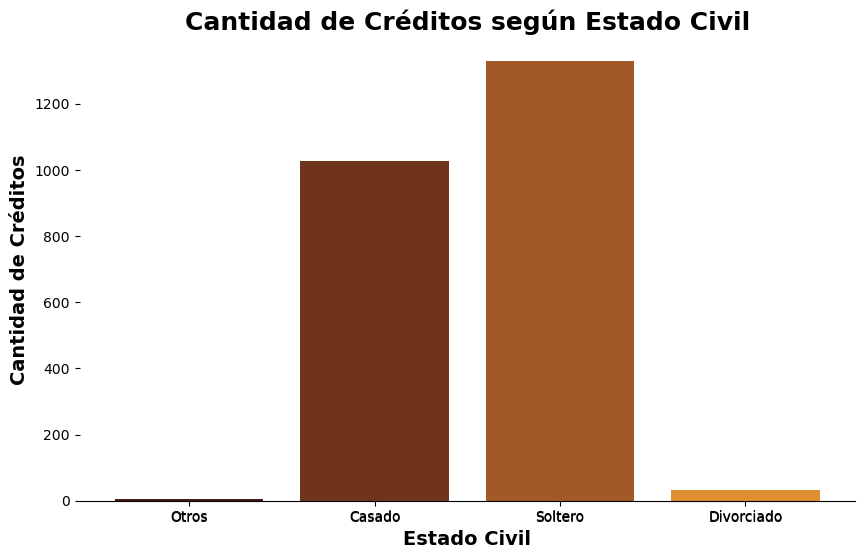

In [16]:
# Definir un diccionario de mapeo para el estado civil
estado_civil_dict = {0: 'Otros', 1: 'Casado', 2: 'Soltero', 3: 'Divorciado'}
# Agrupar el DataFrame por la columna 'MARRIAGE' y contar la cantidad en cada grupo
dfGraf = dbbanco.groupby('MARRIAGE').size().reset_index(name='Count')

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#4a1b14', '#70341d', '#a25927', '#de8d31']
ax.bar(dfGraf['MARRIAGE'], dfGraf['Count'], color=colors)

# Etiquetas y título del gráfico
ax.set_xlabel('Estado Civil', fontsize=14, fontweight='bold')
ax.set_ylabel('Cantidad de Créditos', fontsize=14, fontweight='bold')
ax.set_title('Cantidad de Créditos según Estado Civil', fontsize=18, fontweight='bold')

# Establecer ticks del eje x y ocultar números
ax.set_xticks(dfGraf['MARRIAGE'])
ax.set_xticklabels([estado_civil_dict[m] for m in dfGraf['MARRIAGE']])

# Agregar los textos con los valores correspondientes
for i, v in enumerate(dfGraf['MARRIAGE']):
    ax.text(i, -60, f"{estado_civil_dict[v]}", ha='center', fontsize=10)

# Mostrar el gráfico
plt.show()

El gráfico de barras representa la distribución de la cantidad de créditos según el estado civil de los clientes. Cada barra en el gráfico corresponde a una categoría única de estado civil, y la altura de la barra indica la cantidad de créditos asociados con esa categoría. Los colores de las barras permiten distinguir visualmente entre las diferentes categorías de estado civil. En este contexto, el gráfico proporciona una visión rápida y clara de cómo se distribuyen los créditos en función del estado civil de los clientes.

In [17]:
#Se agrupan y cuenta la cantidad de registros segun marca
dfGraf = dbbanco.groupby(['EDUCATION']).count()
#Se selecciona unicamente el indice y la primera columna
dfGraf = dfGraf.iloc[:,:1]
#Se ordenan los datos de mayor a menos
#dfGraf = dfGraf.sort_values('LIMIT_BAL', ascending = False)
#Se muestra el Dataframe para graficar.
dfGraf

,LIMIT_BAL
EDUCATION,
graduate school,909
high school,392
other,18
university,1077


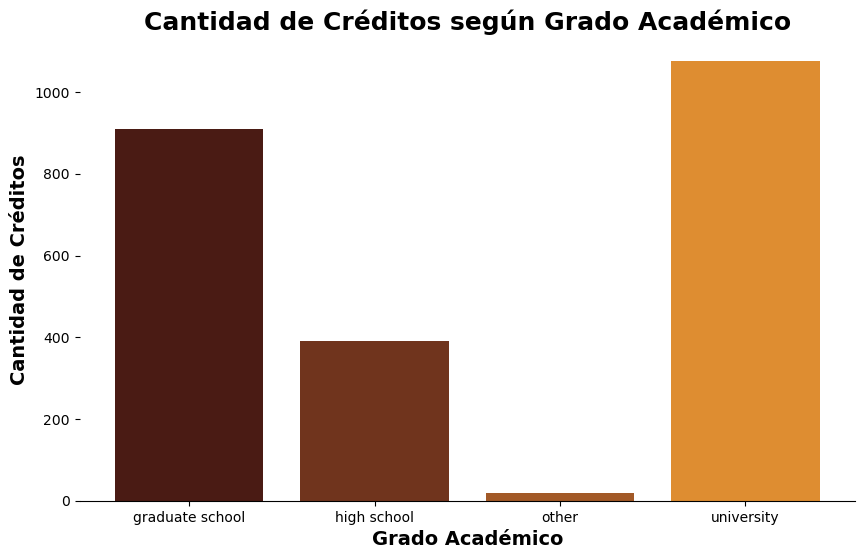

In [18]:
# Agrupar el DataFrame por la columna 'EDUCATION' y contar la cantidad de elementos en cada grupo
dfGraf = dbbanco.groupby('EDUCATION').size().reset_index(name='Count')

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
# Definir los colores para las barras
colors = ['#4a1b14', '#70341d', '#a25927', '#de8d31']
# Crear las barras utilizando los datos de 'EDUCATION' y 'Count'
ax.bar(dfGraf['EDUCATION'], dfGraf['Count'], color=colors)

# Etiquetas y título del gráfico
ax.set_xlabel('Grado Académico', fontsize=14, fontweight='bold')
ax.set_ylabel('Cantidad de Créditos', fontsize=14, fontweight='bold')
ax.set_title('Cantidad de Créditos según Grado Académico', fontsize=18, fontweight='bold')

# Mostrar el gráfico
plt.show()

El gráfico de barras representa la distribución de la cantidad de créditos según el grado académico. Cada barra en el gráfico corresponde a una categoría única de grado académico, y la altura de la barra indica la cantidad de créditos asociados con esa categoría. Los colores de las barras permiten distinguir visualmente entre las diferentes categorías de grado académico. En este contexto, el gráfico proporciona una visión rápida y clara de cómo se distribuyen los créditos en función del nivel educativo de los clientes.

In [19]:
#Se agrupan y cuenta la cantidad de registros segun marca
dfGraf = dbbanco.groupby(['SEX']).count()
#Se selecciona unicamente el indice y la primera columna
dfGraf = dfGraf.iloc[:,:1]
#Se ordenan los datos de mayor a menos
#dfGraf = dfGraf.sort_values('LIMIT_BAL', ascending = False)
#Se muestra el Dataframe para graficar.
dfGraf

,LIMIT_BAL
SEX,
female,1384
male,1012


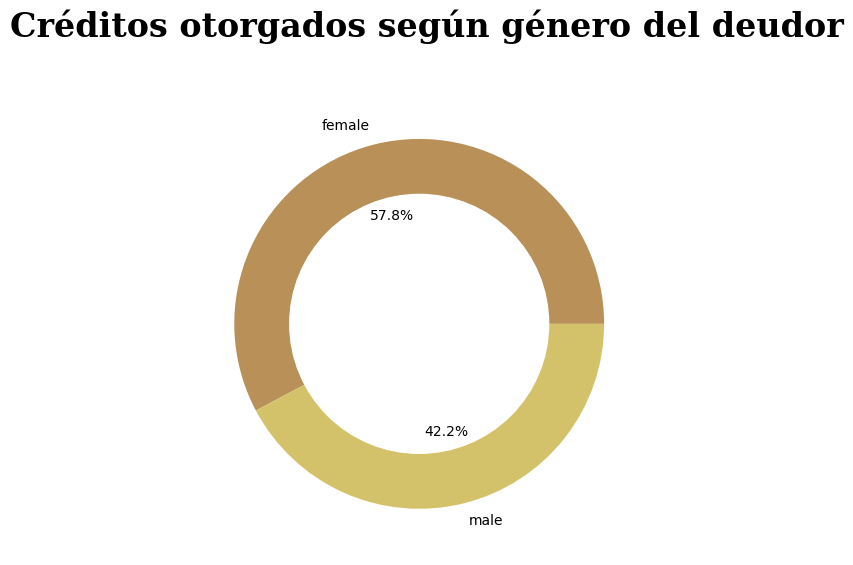

In [20]:
# Preparación de listas de nombres (etiquetas) y estilos (valores) para el gráfico de anillos
names = dfGraf.index.tolist()
style = dfGraf['LIMIT_BAL'].tolist()

# Creación de una figura y ejes para el gráfico con tamaño y resolución específicos
fig, ax = plt.subplots(1, 1, figsize=(8, 6.9), dpi=100)

# Creación de un círculo blanco que servirá como base para el gráfico de anillos
circulo = plt.Circle((0, 0), 0.7, color='white')

# Generación del gráfico de anillos con valores proporcionales y colores específicos
plt.pie(style, labels=names, autopct='%1.1f%%', colors=['#b89058', '#d4c26a'])

# Establecimiento del título del gráfico con tamaño y estilo específicos
ax.set_title('Créditos otorgados según género del deudor',
             horizontalalignment='left',
             x=0.001,
             y=0.86,
             transform=fig.transFigure,
             fontsize=24,
             fontweight='bold',
             fontfamily='serif')

# Ajuste de la posición de los subgráficos para que el título se muestre correctamente
plt.subplots_adjust(top=0.78)

# Obtención de la figura actual y adición del círculo blanco como un artista adicional
p = plt.gcf()
p.gca().add_artist(circulo)

# Mostrar el gráfico de anillos
plt.show()

El gráfico de barras representa la distribución de la cantidad de créditos según el sexo de los clientes. Cada barra en el gráfico corresponde a una categoría única de sexo, y la longitud de la barra indica la cantidad de créditos asociados con esa categoría. Los colores de las barras permiten distinguir visualmente entre los diferentes sexos. En este contexto, el gráfico proporciona una visión rápida y clara de cómo se distribuyen los créditos en función del sexo de los clientes.

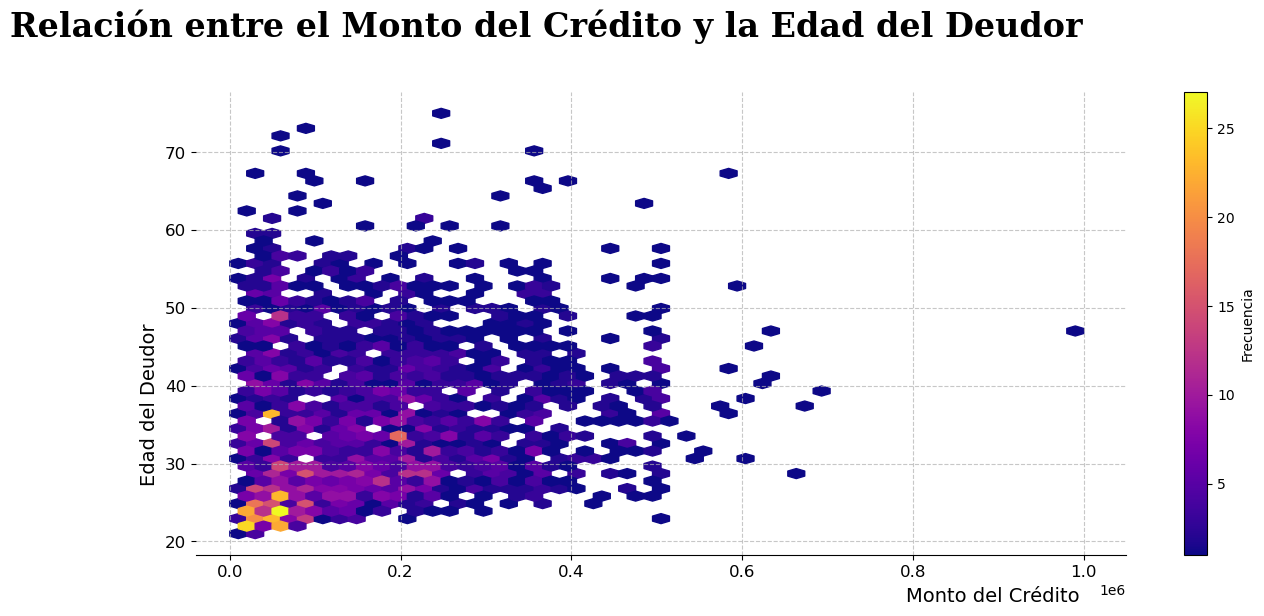

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6.9), dpi=100)

# Crear un gráfico de hexbin con una paleta de colores más variada
hb = ax.hexbin(dbbanco['LIMIT_BAL'], dbbanco['AGE'], gridsize=50, cmap='plasma', mincnt=1)

# Formato del gráfico
title_t = 'Relación entre el Monto del Crédito y la Edad del Deudor'
ax.set_title(title_t, horizontalalignment='left', x=0.001, y=0.86, transform=fig.transFigure,
             fontsize=24, fontweight='bold', fontfamily='serif')

ax.set_xlabel('Monto del Crédito', ha='right', fontsize=14, fontweight='regular', fontfamily='sans')
ax.set_ylabel('Edad del Deudor', ha='right', fontsize=14, fontweight='regular', fontfamily='sans')
ax.xaxis.set_label_coords(x=0.95, y=-0.07, transform=ax.transAxes)

# Añadir una barra de color
cb = fig.colorbar(hb, ax=ax, label='Frecuencia')

# Ajustar parámetros del gráfico
ax.grid(True, linestyle='--', alpha=0.7)
ax.tick_params(axis='both', labelsize=12)
plt.subplots_adjust(top=0.78)

# Mostrar el gráfico
plt.show()